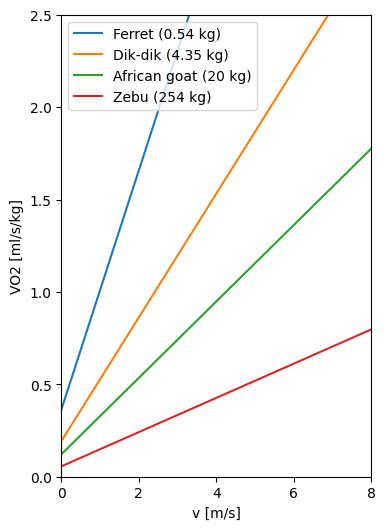

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def energy(m:float, v:float) -> float:
    """
    Compute energy of animal moving at speed v with mass m
     - m: mass of animal in kg
     - v: speed of animal in m/s
     - Vdot_02perkg: oxygen consumption rate per kg of animal in ml/s/kg
    """
    slope = 0.533 * np.power(m, -0.316)
    intercept = 0.300 * np.power(m, -0.303)
    Vdot_02perkg = slope * v + intercept
    return Vdot_02perkg

def make_energy_plot():
    fig, ax = plt.subplots(figsize=(4, 6))
    v = np.linspace(0, 8, 100)

    m_list = [.54, 4.35, 20, 254]
    names = ['Ferret', 'Dik-dik', 'African goat', 'Zebu']


    for m, name in zip(m_list, names):
        ax.plot(v, energy(m, v), label=f'{name} ({m} kg)')

    ax.set_xlabel('v [m/s]')
    ax.set_ylabel('VO2 [ml/s/kg]')
    ax.set_xlim(0, 8)
    ax.set_ylim(0, 2.5)
    ax.legend()

make_energy_plot()

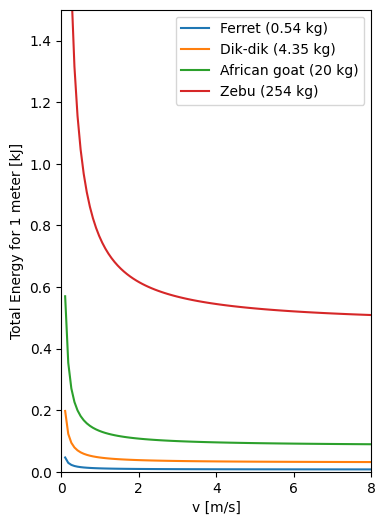

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def energy(m:float, v:float) -> float:
    """
    Compute oxygen consumption rate (Vdot_O2 per kg) for an animal moving at speed v with mass m.
     - m: mass of animal in kg
     - v: speed of animal in m/s
    Returns oxygen consumption rate in ml/s/kg.
    """
    slope = 0.533 * np.power(m, -0.316)
    intercept = 0.300 * np.power(m, -0.303)
    Vdot_02perkg = slope * v + intercept
    return Vdot_02perkg

def total_energy(m:float, v:float) -> float:
    """
    Compute the total energy expenditure (in kJ) for moving 1 meter.
     - m: mass of animal in kg
     - v: speed of animal in m/s
    Returns the total energy in kJ.
    """
    Vdot_O2 = energy(m, v)  # Oxygen consumption rate per kg [ml/s/kg]
    
    # Convert to total oxygen consumption per second (ml/s)
    Vdot_O2_total = Vdot_O2 * m  # [ml/s]

    if v == 0:
        return 0  # No movement, no energy consumption
    
    # Time to travel 1 meter
    t = 1 / v  # [s]

    # Total oxygen consumed to cover 1 meter (ml)
    O2_consumed = Vdot_O2_total * t  # [ml]

    # Convert ml to liters
    O2_consumed_liters = O2_consumed / 1000  # [L]

    # Convert oxygen consumption to energy (kJ)
    energy_kJ = O2_consumed_liters * 20.1  # [kJ]
    
    return energy_kJ

def make_energy_plot():
    fig, ax = plt.subplots(figsize=(4, 6))
    v = np.linspace(0.1, 8, 100)  # Avoid dividing by zero by starting from 0.1 m/s

    m_list = [.54, 4.35, 20, 254]
    names = ['Ferret', 'Dik-dik', 'African goat', 'Zebu']

    for m, name in zip(m_list, names):
        energy_values = [total_energy(m, speed) for speed in v]
        ax.plot(v, energy_values, label=f'{name} ({m} kg)')

    ax.set_xlabel('v [m/s]')
    ax.set_ylabel('Total Energy for 1 meter [kJ]')
    ax.set_xlim(0, 8)
    ax.set_ylim(0, 1.5)
    ax.legend()

make_energy_plot()
plt.show()


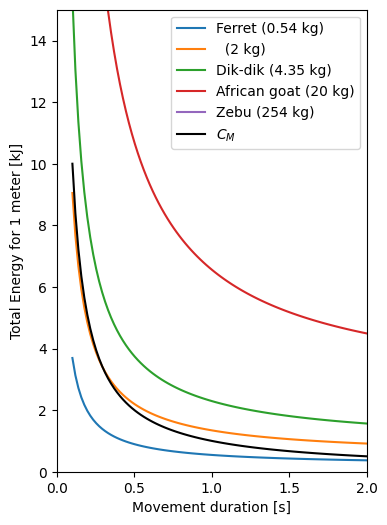

In [5]:
import numpy as np

def compute_total_energy(duration: float, weight: float, distance=1) -> float:
    """
    Compute total energy expended for moving 1 meter.
    - m: mass of the animal in kg
    - duration: duration to move 1 meter in seconds
    - weight: weight of the animal in kg
    """
    # Calculate speed (v) in m/s
    v = distance / duration  # Speed = distance / time
    
    # Calculate VO2 (oxygen consumption) using the provided energy function
    Vdot_O2_per_kg = energy(weight, v)  # in ml/s/kg
    
    # Total VO2 in ml/s for the animal
    total_Vdot_O2 = Vdot_O2_per_kg * weight  # in ml/s
    
    # Convert to liters
    total_Vdot_O2_L = total_Vdot_O2 / 1000  # Convert from ml to L
    
    # Convert to energy (kJ), using 20.1 kJ/L as a conversion factor
    energy_expended = total_Vdot_O2_L * 20.1  # in kJ
    
    return total_Vdot_O2

def make_energy_plot():
    fig, ax = plt.subplots(figsize=(4, 6))

    m_list = [.54, 2, 4.35, 20, 254]
    names = ['Ferret', ' ', 'Dik-dik', 'African goat',  'Zebu']
    durations = np.linspace(0.1, 2, 100)

    for m, name in zip(m_list, names):
        total_energy = [compute_total_energy(duration, m, distance=1) for duration in durations]
        ax.plot(durations, total_energy, label=f'{name} ({m} kg)')
    
    ax.plot(durations, effort_cost(durations, D=1), label=r'$C_M$', c='k')

    ax.set_xlabel('Movement duration [s]')
    ax.set_ylabel('Total Energy for 1 meter [kJ]')
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 15)
    ax.legend()

make_energy_plot()
plt.show()

C:\Users\MORVAN\AppData\Local\Temp\ipykernel_16996\3732158389.py:6: RuntimeWarning: invalid value encountered in multiply
  return effort_sensitivity * T * (vmax ** power_effort)


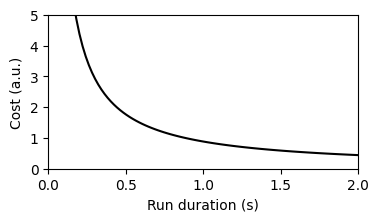

In [4]:
# effort cost for a movement of duration T, distance D, with a belt speed of vbelt
def effort_cost(T, D=1, effort_sensitivity=1, vbelt=0, power_effort=2):
    np.seterr(divide='ignore')
    # np.seterr(multiply='ignore')
    vmax = (D - vbelt * T) / (T)
    return effort_sensitivity * T * (vmax ** power_effort)

def Figure3E_(ax=None, D=.94, vbelt=0, effort_sensitivity=1, tau=1, power_effort=2, power_time=3):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(4, 2))

    t = np.linspace(0, 2, 100)
    ax.plot(t, effort_cost(t, D, effort_sensitivity, vbelt, power_effort), label=r'$C_M$', c='k')  # label=r'$C_M$, $\varsigma$=1, $\beta$=2'


    ax.set_xlabel('Run duration (s)')
    ax.set_ylabel('Cost (a.u.)')
    ax.set_ylim(0, 5)
    ax.set_xlim(0, 2)


Figure3E_()